In [ ]:
# 下载PaddleDetection代码
!git clone https://gitee.com/paddlepaddle/PaddleDetection.git

Cloning into 'PaddleDetection'...
remote: Enumerating objects: 25252, done.
remote: Counting objects: 100% (5722/5722), done.
remote: Compressing objects: 100% (2478/2478), done.
remote: Total 25252 (delta 4224), reused 4441 (delta 3233), pack-reused 19530
Receiving objects: 100% (25252/25252), 266.33 MiB | 9.63 MiB/s, done.
Resolving deltas: 100% (18773/18773), done.
Checking connectivity... done.
Checking out files: 100% (1951/1951), done.


In [ ]:
# 移到work目录下，持久安装
!mv PaddleDetection work 

In [ ]:
#配置PaddleDetection环境 
!pip install -r /home/aistudio/work/PaddleDetection/requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.7 MB/s eta 0:00:00a 0:00:01
  Created wheel for pycocotools: filename=pycocotools-2.0.4-cp37-cp37m-linux_x86_64.whl size=273774 sha256=2ecd8f980b7a0e4487114b54bda54574403837f39c4893ff67e9503f8a077591
  Stored in directory: /home/aistudio/.cache/pip/wheels/c0/01/5f/670dfd20204fc9cc6bf843db4e014acb998f411922e3abc49f
  Created wheel for lap: filename=lap-0.4.0-cp37-cp37m-linux_x86_64.whl size=1593863 sha256=dad2b3392ef1f6ee03e63b7f73c82895a730

In [ ]:
#解压数据集
!unzip -oq /home/aistudio/data/data161972/video_data.zip

In [ ]:
%cd work/PaddleDetection/

/home/aistudio/work/PaddleDetection


In [ ]:
!ls

benchmark  deploy		output		  README_en.md	    setup.py
configs    docs			output_inference  README.md	    static
dataset    industrial_tutorial	ppdet		  requirements.txt  test_tipc
demo	   LICENSE		README_cn.md	  scripts	    tools


In [ ]:

# 获得姿态估计模型
!python tools/export_model.py -c configs/keypoint/hrnet/dark_hrnet_w32_384x288.yml -o weights=https://paddledet.bj.bcebos.com/models/keypoint/dark_hrnet_w32_384x288.pdparams
# 获得检测模型
!python tools/export_model.py -c configs/ppyolo/ppyolov2_r50vd_dcn_365e_coco.yml -o weights=https://paddledet.bj.bcebos.com/models/ppyolov2_r50vd_dcn_365e_coco.pdparams


[07/29 19:15:31] ppdet.utils.download INFO: Downloading dark_hrnet_w32_384x288.pdparams from https://paddledet.bj.bcebos.com/models/keypoint/dark_hrnet_w32_384x288.pdparams
100%|████████████████████████████████| 168726/168726 [00:09<00:00, 57378.43KB/s]
[07/29 19:15:42] ppdet.utils.checkpoint INFO: Finish loading model weights: /home/aistudio/.cache/paddle/weights/dark_hrnet_w32_384x288.pdparams
[07/29 19:15:42] ppdet.engine INFO: Export inference config file to output_inference/dark_hrnet_w32_384x288/infer_cfg.yml
W0729 19:15:53.416930   540 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 10.1
W0729 19:15:53.416996   540 gpu_resources.cc:91] device: 0, cuDNN Version: 7.6.
[07/29 19:15:58] ppdet.engine INFO: Export model and saved in output_inference/dark_hrnet_w32_384x288
[07/29 19:16:04] ppdet.utils.download INFO: Downloading ppyolov2_r50vd_dcn_365e_coco.pdparams from https://paddledet.bj.bcebos.com/models/ppyol

# **开始检测**

In [ ]:
!python deploy/python/det_keypoint_unite_infer.py --video_file=../../data/data162587/FIVB_BVB_.mp4 --det_model_dir=output_inference/ppyolov2_r50vd_dcn_365e_coco/ --keypoint_model_dir=output_inference//dark_hrnet_w32_384x288/ --device=GPU


-----------  Running Arguments -----------
camera_id: -1
cpu_threads: 1
det_model_dir: output_inference/ppyolov2_r50vd_dcn_365e_coco/
det_threshold: 0.5
device: GPU
enable_mkldnn: False
image_dir: None
image_file: None
keypoint_batch_size: 8
keypoint_model_dir: output_inference//dark_hrnet_w32_384x288/
keypoint_threshold: 0.5
output_dir: output
run_benchmark: False
run_mode: paddle
save_res: False
trt_calib_mode: False
trt_max_shape: 1280
trt_min_shape: 1
trt_opt_shape: 640
use_dark: True
video_file: ../../data/data162587/FIVB_BVB_.mp4
------------------------------------------
-----------  Model Configuration -----------
Model Arch: YOLO
Transform Order: 
--transform op: Resize
--transform op: NormalizeImage
--transform op: Permute
--------------------------------------------
-----------  Model Configuration -----------
Model Arch: HRNet
Transform Order: 
--transform op: TopDownEvalAffine
--transform op: NormalizeImage
--transform op: Permute
------------------------------------------

In [ ]:
!python deploy/python/det_keypoint_unite_infer.py --video_file=../../1/GH010233.mp4 --det_model_dir=output_inference/ppyolov2_r50vd_dcn_365e_coco/ --keypoint_model_dir=output_inference//dark_hrnet_w32_384x288/ --device=GPU


# **时序配准**

* 先制订模板库
* 特征编码
* DTW时序配准

In [ ]:
!unzip -oq /home/aistudio/kpts.zip

In [1]:
!pip install fastdtw

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp37-cp37m-linux_x86_64.whl size=390853 sha256=d72ff85594a7518a2fa8f877cda3fd7d9b5e7382192fea264512c4f69d8c9ec1
  Stored in directory: /home/aistudio/.cache/pip/wheels/2e/e9/c2/b1edb42668a52b24bdd9775760480bb6b650147e67998cc158
Successfully built fastdtw

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


一号机，第一段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/1/GH010233.npy', allow_pickle=True)
print(len(zz))
start1 = int(877)   #输入标准视频的起始帧号

Action = {'预备式': [0, 92], '虚步亮掌': [93, 233], '上步对拳': [234, 316], '弓步推掌': [329, 409],
          '弹腿击掌': [423, 427], "后点步冲拳": [434, 454], '歇步挑掌': [459, 543], '并步冲拳': [557, 622],
          '腾空摆莲360度': [641, 722], "并步拍地": [725, 759], "单拍脚1": [760, 813], '提膝跳冲拳': [838, 888],
          '腾空飞脚': [913, 1024], '侧空翻': [1029, 1107], '旋风脚360度': [1140, 1196], '跌竖叉': [1197, 1359], 
          '盖步冲拳': [1243, 1509], '单拍脚2': [1509, 1584], '侧踹腿': [1584, 1615], '抡臂拍地': [1584, 1669], 
          '震脚按掌': [1669, 1718], '弓步冲拳': [1718, 1761], '横档步亮掌': [1761, 1860]}


#   读入测试数据
TEST = np.load("kpts/1/GH010236.npy", allow_pickle=True)
print(len(TEST))
start2 = int(188) #输入测试视频的起始帧号

3151
2520


一号机，第二段

In [2]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/1/GH010240.npy', allow_pickle=True)
print(len(zz))
start1 = int(163)   #输入标准视频的起始帧号

Action = {'踢腿撩掌': [251, 358], '跳提膝勾手推掌': [358, 420], '腾空箭弹': [420, 526], '插步双掌': [526, 587],
          '弓步勾手推掌': [587, 646], "跳转身仆步切掌": [646, 722], '弓步架冲拳': [722, 798], '弓步贯拳': [798, 870],
          '后扫腿': [870, 972], "仆步亮掌": [972, 1020] }

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1


#   读入测试数据
TEST = np.load("kpts/1/GH010242.npy", allow_pickle=True)
print(len(TEST))
start2 = int(211) #输入测试视频的起始帧号

1341
1275


一号机，第三段1

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/1/GH010243.npy', allow_pickle=True)
print(len(zz))
start1 = int(352)   #输入标准视频的起始帧号

Action = {'正踢腿': [385, 569], '燕式平衡': [569, 749], '弓步十字拳': [749, 865], '弓步左冲拳': [865, 923],
          '提膝挑掌': [923, 992], "弧形步": [992, 1082], '扣腿双掌': [1082, 1105], '击步劈打': [1105, 1131],
          '弓步靠掌': [1131, 1186], "弓步双勾手": [1186, 1205] }

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1


#   读入测试数据
TEST = np.load("kpts/1/GH010245.npy", allow_pickle=True)
print(len(TEST))
start2 = int(178) #输入测试视频的起始帧号

1471
1568


一号机，第四段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/1/GH010605.npy', allow_pickle=True)
print(len(zz))
start1 = int(263)   #输入标准视频的起始帧号

Action = {'垫步踐腿': [245, 307], '弓步劈拳': [307, 331], '马步托打': [331, 364], '插步抓肩': [364, 394],
          '马步架打': [394, 463], "提膝架掌": [463, 527], '提膝冲拳': [527, 606], '旋子': [606, 740],
          '坐盘': [740, 796], "击响外腿": [796, 969], '打虎势': [969, 1020], '弓步顶肘': [1020, 1088], 
          '抡臂砸拳': [1088, 1168], '虚步挑掌': [1168, 1283], '转身云手': [1283, 1410], '并步拳': [1410, 1444],
          '收势并步': [1444, 1575]}

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1


#   读入测试数据
TEST = np.load("kpts/1/GH010248.npy", allow_pickle=True)
print(len(TEST))
start2 = int(176) #输入测试视频的起始帧号

1686
1575


二号机，第一段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/2/GH010605.npy', allow_pickle=True)
print(len(zz))
start1 = int(877)   #输入标准视频的起始帧号

Action = {'预备式': [346, 396], '虚步亮掌': [400, 454], '上步对拳': [454, 538], '弓步推掌': [538, 621],
          '弹腿击掌': [621, 670], "后点步冲拳": [670, 685], '歇步挑掌': [685, 769], '并步冲拳': [769, 839],
          '腾空摆莲360度': [839, 954], "并步拍地": [954, 980], "单拍脚1": [980, 1055], '提膝跳冲拳': [1055, 1119],
          '腾空飞脚': [1119, 1248], '侧空翻': [1248, 1321], '旋风脚360度': [1321, 1430], '跌竖叉': [1430, 1516], 
          '盖步冲拳': [1516, 1713], '单拍脚2': [1713, 1786], '侧踹腿': [1786, 1817], '抡臂拍地': [1817, 1867], 
          '震脚按掌': [1867, 1909], '弓步冲拳': [1909, 1962], '横档步亮掌': [1962, 2078]}

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1

#   读入测试数据
TEST = np.load("kpts/2/GH010603.npy", allow_pickle=True)
print(len(TEST))
start2 = int(286) #输入测试视频的起始帧号

2243
2603


二号机，第二段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/2/GH010608.npy', allow_pickle=True)
print(len(zz))
start1 = int(229)   #输入标准视频的起始帧号

Action = {'踢腿撩掌': [312, 429], '跳提膝勾手推掌': [429, 493], '腾空箭弹': [493, 594], '插步双掌': [594, 657],
          '弓步勾手推掌': [657, 711], "跳转身仆步切掌": [711, 788], '弓步架冲拳': [788, 872], '弓步贯拳': [872, 931],
          '后扫腿': [931, 1046], "仆步亮掌": [1046, 1094] }

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1

#   读入测试数据
TEST = np.load("kpts/2/GH010610.npy", allow_pickle=True)
print(len(TEST))
start2 = int(200) #输入测试视频的起始帧号

1361
1222


二号机，第三段1

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/2/GH010611.npy', allow_pickle=True)
print(len(zz))
start1 = int(356)   #输入标准视频的起始帧号

Action = {'正踢腿': [389, 579], '燕式平衡': [579, 751], '弓步十字拳': [751, 877], '弓步左冲拳': [877, 928],
          '提膝挑掌': [928, 1000], "弧形步": [1000, 1086], '扣腿双掌': [1086, 1106], '击步劈打': [1106, 1130],
          '弓步靠掌': [1130, 1189], "弓步双勾手": [1189, 1217] }

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1


#   读入测试数据
TEST = np.load("kpts/2/GH010613.npy", allow_pickle=True)
print(len(TEST))
start2 = int(252) #输入测试视频的起始帧号

1457
1477


二号机，第四段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/2/GH010614.npy', allow_pickle=True)
print(len(zz))
start1 = int(252)   #输入标准视频的起始帧号

Action = {'垫步踐腿': [297, 351], '弓步劈拳': [351, 380], '马步托打': [380, 408], '插步抓肩': [408, 438],
          '马步架打': [438, 485], "提膝架掌": [485, 581], '提膝冲拳': [581, 651], '旋子': [651, 786],
          '坐盘': [786, 886], "击响外腿": [886, 1016], '打虎势': [1016, 1067], '弓步顶肘': [1067, 1123], 
          '抡臂砸拳': [1123, 1213], '虚步挑掌': [1213, 1368], '转身云手': [1368, 1455], '并步拳': [1455, 1508],
          '收势并步': [1508, 1616]}

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1


#   读入测试数据
TEST = np.load("kpts/2/GH010616.npy", allow_pickle=True)
print(len(TEST))
start2 = int(217) #输入测试视频的起始帧号

1763
1695


三号机，第一段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/3/GX010529.npy', allow_pickle=True)
print(len(zz))
start1 = int(956)   #输入标准视频的起始帧号

Action = {'预备式': [1056, 1117], '虚步亮掌': [1117, 1173], '上步对拳': [1173, 1268], '弓步推掌': [1268, 1343],
          '弹腿击掌': [1343, 1391], "后点步冲拳": [1391, 1409], '歇步挑掌': [1409, 1495], '并步冲拳': [1495, 1566],
          '腾空摆莲360度': [1566, 1671], "并步拍地": [1671, 1705], "单拍脚1": [1705, 1770], '提膝跳冲拳': [1770, 1842],
          '腾空飞脚': [1842, 1964], '侧空翻': [1964, 2040], '旋风脚360度': [2040, 2146], '跌竖叉': [2146, 2261], 
          '盖步冲拳': [2261, 2460], '单拍脚2': [2460, 2537], '侧踹腿': [2537, 2577], '抡臂拍地': [2577, 2625], 
          '震脚按掌': [2625, 2683], '弓步冲拳': [2683, 2716], '横档步亮掌': [2716, 2824]}

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1

#   读入测试数据
TEST = np.load("kpts/3/GX010532.npy", allow_pickle=True)
print(len(TEST))
start2 = int(264) #输入测试视频的起始帧号

3233
2489


三号机，第二段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/3/GX010536.npy', allow_pickle=True)
print(len(zz))
start1 = int(192)   #输入标准视频的起始帧号

Action = {'踢腿撩掌': [275, 398], '跳提膝勾手推掌': [398, 457], '腾空箭弹': [457, 561], '插步双掌': [561, 623],
          '弓步勾手推掌': [623, 679], "跳转身仆步切掌": [679, 755], '弓步架冲拳': [755, 838], '弓步贯拳': [838, 899],
          '后扫腿': [899, 998], "仆步亮掌": [998, 1082] }

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1

#   读入测试数据
TEST = np.load("kpts/3/GX010538.npy", allow_pickle=True)
print(len(TEST))
start2 = int(242) #输入测试视频的起始帧号

1300
1331


三号机，第三段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/3/GX010541.npy', allow_pickle=True)
print(len(zz))
start1 = int(259)   #输入标准视频的起始帧号

Action = {'正踢腿': [], '燕式平衡': [], '弓步十字拳': [], '弓步左冲拳': [],
          '提膝挑掌': [], "弧形步": [], '扣腿双掌': [], '击步劈打': [],
          '弓步靠掌': [], "弓步双勾手": [] }

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1


#   读入测试数据
TEST = np.load("kpts/3/GX010543.npy", allow_pickle=True)
print(len(TEST))
start2 = int(208) #输入测试视频的起始帧号

1641
1624


三号机，第四段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/3/GX010542.npy', allow_pickle=True)
print(len(zz))
start1 = int(259)   #输入标准视频的起始帧号

Action = {'垫步踐腿': [309, 363], '弓步劈拳': [363, 393], '马步托打': [393, 427], '插步抓肩': [427, 449],
          '马步架打': [449, 506], "提膝架掌": [506, 592], '提膝冲拳': [592, 653], '旋子': [653, 794],
          '坐盘': [794, 903], "击响外腿": [903, 1023], '打虎势': [1023, 1082], '弓步顶肘': [1082, 1146], 
          '抡臂砸拳': [1146, 1232], '虚步挑掌': [1232, 1377], '转身云手': [1377, 1448], '并步拳': [1448, 1525],
          '收势并步': [1525, 1626]}

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1


#   读入测试数据
TEST = np.load("kpts/3/GX010544.npy", allow_pickle=True)
print(len(TEST))
start2 = int(194) #输入测试视频的起始帧号

1734
1632


四号机，第一段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/4/GH010323.npy', allow_pickle=True)
print(len(zz))
start1 = int(938)   #输入标准视频的起始帧号

Action = {'预备式': [1038, 1089], '虚步亮掌': [1089, 1162], '上步对拳': [1162, 1241], '弓步推掌': [1241, 1330],
          '弹腿击掌': [1330, 1376], "后点步冲拳": [1376, 1393], '歇步挑掌': [1393, 1483], '并步冲拳': [1483, 1550],
          '腾空摆莲360度': [1550, 1660], "并步拍地": [1660, 1690], "单拍脚1": [1690, 1753], '提膝跳冲拳': [1753, 1818],
          '腾空飞脚': [1818, 1949], '侧空翻': [1949, 2023], '旋风脚360度': [2023, 2131], '跌竖叉': [2131, 2251], 
          '盖步冲拳': [2251, 2448], '单拍脚2': [2448, 2523], '侧踹腿': [2523, 2557], '抡臂拍地': [2557, 2610], 
          '震脚按掌': [2610, 2665], '弓步冲拳': [2665, 2710], '横档步亮掌': [2710, 2808]}

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1

#   读入测试数据
TEST = np.load("kpts/4/GH010326.npy", allow_pickle=True)
print(len(TEST))
start2 = int(226) #输入测试视频的起始帧号

3325
2554


四号机，第二段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/4/GH010330.npy', allow_pickle=True)
print(len(zz))
start1 = int(189)   #输入标准视频的起始帧号

Action = {'踢腿撩掌': [276, 395], '跳提膝勾手推掌': [395, 451], '腾空箭弹': [451, 551], '插步双掌': [551, 612],
          '弓步勾手推掌': [612, 668], "跳转身仆步切掌": [668, 748], '弓步架冲拳': [748, 823], '弓步贯拳': [823, 890],
          '后扫腿': [890, 992], "仆步亮掌": [992, 1050] }

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1


#   读入测试数据
TEST = np.load("kpts/4/GH010332.npy", allow_pickle=True)
print(len(TEST))
start2 = int(190) #输入测试视频的起始帧号

2030
1388


四号机，第三段

In [ ]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/4/GH010333.npy', allow_pickle=True)
print(len(zz))
start1 = int(387)   #输入标准视频的起始帧号

Action = {'正踢腿': [421, 613], '燕式平衡': [613, 790], '弓步十字拳': [790, 911], '弓步左冲拳': [911, 961],
          '提膝挑掌': [961, 1029], "弧形步": [1029, 1116], '扣腿双掌': [1116, 1139], '击步劈打': [1139, 1173],
          '弓步靠掌': [1173, 1223], "弓步双勾手": [1223, 1256] }

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1


#   读入测试数据
TEST = np.load("kpts/4/GH010335.npy", allow_pickle=True)
print(len(TEST))
start2 = int(194) #输入测试视频的起始帧号

1488
1461


四号机，第四段

In [19]:
import numpy as np

#   读入标准动作
zz = np.load('kpts/4/GH010336.npy', allow_pickle=True)
print(len(zz))
start1 = int(319)   #输入标准视频的起始帧号

Action = {'垫步踐腿': [369, 418], '弓步劈拳': [418, 442], '马步托打': [442, 475], '插步抓肩': [475, 505],
          '马步架打': [505, 573], "提膝架掌": [573, 658], '提膝冲拳': [658, 719], '旋子': [719, 853],
          '坐盘': [853, 957], "击响外腿": [957, 1082], '打虎势': [1082, 1146], '弓步顶肘': [1146, 1204], 
          '抡臂砸拳': [1204, 1302], '虚步挑掌': [1302, 1438], '转身云手': [1438, 1498], '并步拳': [1498, 1583],
          '收势并步': [1583, 1680]}

for key, value in Action.items():
    value[0] = value[0]-start1
    value[1] = value[1]-start1


#   读入测试数据
TEST = np.load("kpts/4/GH010338.npy", allow_pickle=True)
print(len(TEST))
start2 = int(209) #输入测试视频的起始帧号

1866
1699


len_test0 1699 [[2.81124573e+02 6.58851929e+02 9.65133011e-01]
 [2.82166534e+02 6.55529541e+02 9.60212529e-01]
 [2.75251587e+02 6.55103394e+02 9.88369107e-01]
 [2.82850952e+02 6.58585022e+02 6.66528523e-01]
 [2.60933533e+02 6.59238403e+02 9.63168442e-01]
 [2.83900848e+02 6.80888123e+02 8.88534665e-01]
 [2.48998322e+02 6.79241760e+02 8.29027832e-01]
 [2.76356079e+02 7.06386536e+02 5.09549677e-01]
 [2.19605209e+02 6.99837891e+02 9.36999142e-01]
 [2.67825500e+02 7.15309143e+02 6.77433848e-01]
 [1.92712738e+02 7.16282471e+02 9.21644270e-01]
 [2.65119751e+02 7.25360229e+02 8.13805938e-01]
 [2.37634552e+02 7.24627563e+02 7.97456801e-01]
 [2.98409424e+02 7.33299255e+02 8.59598100e-01]
 [1.87306274e+02 7.53388977e+02 7.57585108e-01]
 [2.95506897e+02 7.71508484e+02 8.56741011e-01]
 [1.45528595e+02 7.69470520e+02 7.43844688e-01]]


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


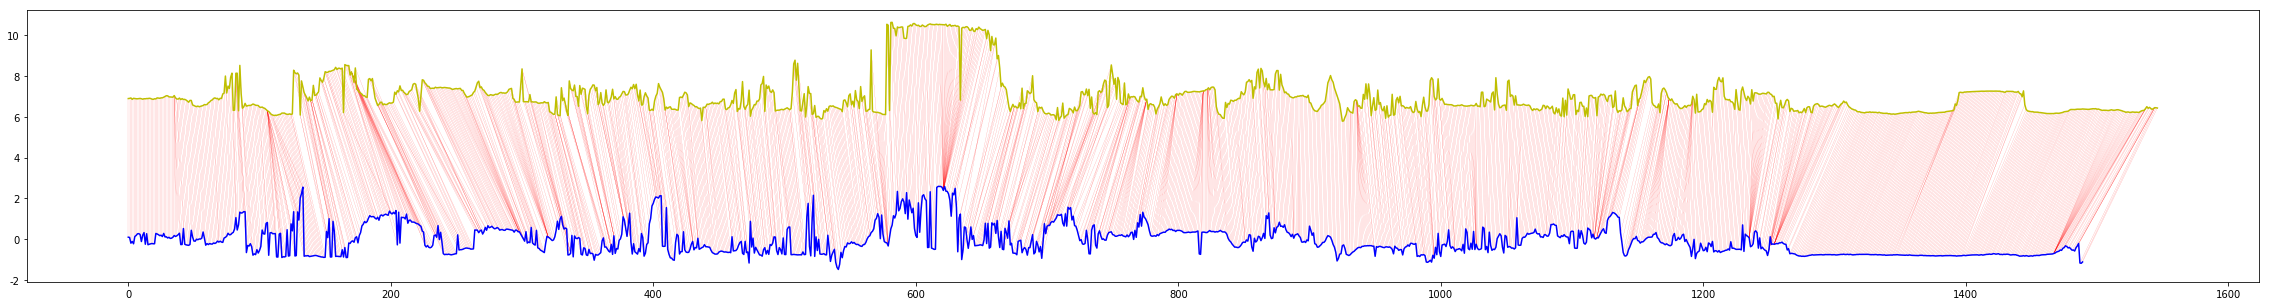

垫步踐腿
弓步劈拳
马步托打
插步抓肩
马步架打
提膝架掌
提膝冲拳
旋子
坐盘
击响外腿
打虎势
弓步顶肘
抡臂砸拳
虚步挑掌
转身云手
并步拳
收势并步
['垫步踐腿_start', 264]
['垫步踐腿_end', 315]
['弓步劈拳_start', 315]
['弓步劈拳_end', 356]
['马步托打_start', 356]
['马步托打_end', 402]
['插步抓肩_start', 402]
['插步抓肩_end', 448]
['马步架打_start', 448]
['马步架打_end', 507]
['提膝架掌_start', 507]
['提膝架掌_end', 577]
['提膝冲拳_start', 577]
['提膝冲拳_end', 624]
['提膝冲拳_end', 625]
['旋子_start', 624]
['旋子_start', 625]
['旋子_end', 756]
['坐盘_start', 756]
['坐盘_end', 830]
['击响外腿_start', 830]
['击响外腿_end', 936]
['击响外腿_end', 937]
['击响外腿_end', 938]
['击响外腿_end', 939]
['击响外腿_end', 940]
['打虎势_start', 936]
['打虎势_start', 937]
['打虎势_start', 938]
['打虎势_start', 939]
['打虎势_start', 940]
['打虎势_end', 1045]
['弓步顶肘_start', 1045]
['弓步顶肘_end', 1097]
['抡臂砸拳_start', 1097]
['抡臂砸拳_end', 1202]
['虚步挑掌_start', 1202]
['虚步挑掌_end', 1322]
['转身云手_start', 1322]
['转身云手_end', 1378]
['并步拳_start', 1378]
['并步拳_end', 1453]
['收势并步_start', 1453]
['收势并步_end', 1523]
[['垫步踐腿', 264, 315], ['弓步劈拳', 315, 356], ['马步托打', 356, 402], ['插步抓肩', 402, 448], ['马步架打', 

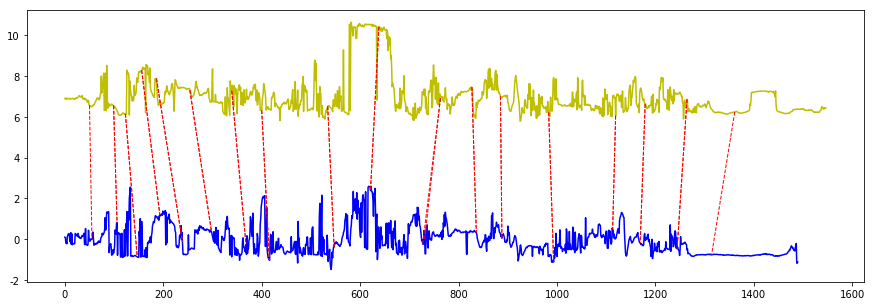

In [45]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from math import sqrt
import cv2
from PIL import Image, ImageDraw, ImageFont
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, cosine
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


def preprocess(arr):
    ARR = []
    for i_ in range(len(arr)):
        if len(arr[i_][2][:][0]) != 0:
            j_ = arr[i_][2][:][0][0]
        else:
            j_ = np.random.rand(17, 3)  #有时运动员的id不一定是0号，也不一定能检测到运动员，所以补上随机数矩阵，不能有空数组
        ARR.append(j_)
    return np.array(ARR)


def get_angle(arr):
    ARR = []
    for i in range(len(arr)):
        # 右肘角
        cos1 = (((arr[i][5][0]-arr[i][7][0])*(arr[i][7][0]-arr[i][9][0])) + ((arr[i][5][1]-arr[i][7][1])*(arr[i][7][1]-arr[i][9][1]))) / (
            sqrt((arr[i][5][0]-arr[i][7][0])**2 + (arr[i][5][1]-arr[i][7][1])**2) * sqrt((arr[i][7][0]-arr[i][9][0])**2 + (arr[i][7][1]-arr[i][9][1])**2)
        )
        # 左肘角
        cos2 = (((arr[i][6][0] - arr[i][8][0]) * (arr[i][8][0] - arr[i][10][0])) + ((arr[i][6][1] - arr[i][8][1]) * (arr[i][8][1] - arr[i][10][1]))) / (
                       sqrt((arr[i][6][0] - arr[i][8][0]) ** 2 + (arr[i][6][1] - arr[i][8][1]) ** 2) * sqrt((arr[i][8][0] - arr[i][10][0]) ** 2 + (arr[i][8][1] - arr[i][10][1]) ** 2)
               )
        # 右膝角
        cos3 = (((arr[i][11][0] - arr[i][13][0]) * (arr[i][13][0] - arr[i][15][0])) + ((arr[i][11][1] - arr[i][13][1]) * (arr[i][13][1] - arr[i][15][1]))) / (
                       sqrt((arr[i][11][0] - arr[i][13][0]) ** 2 + (arr[i][11][1] - arr[i][13][1]) ** 2) * sqrt((arr[i][13][0] - arr[i][15][0]) ** 2 + (arr[i][13][1] - arr[i][15][1]) ** 2)
               )
        # 左膝角
        cos4 = (((arr[i][12][0] - arr[i][14][0]) * (arr[i][14][0] - arr[i][16][0])) + ((arr[i][12][1] - arr[i][14][1]) * (arr[i][14][1] - arr[i][16][1]))) / (
                       sqrt((arr[i][12][0] - arr[i][14][0]) ** 2 + (arr[i][12][1] - arr[i][14][1]) ** 2) * sqrt((arr[i][14][0] - arr[i][16][0]) ** 2 + (arr[i][14][1] - arr[i][16][1]) ** 2)
               )
        # 右大臂与向下的垂直轴
        cos5 = (arr[i][5][1] - arr[i][7][1]) / sqrt(
            (arr[i][5][0] - arr[i][7][0]) ** 2 + (arr[i][5][1] - arr[i][7][1]) ** 2)
        # 左大臂与向下的垂直轴
        cos6 = (arr[i][6][1] - arr[i][8][1]) / sqrt(
            (arr[i][6][0] - arr[i][8][0]) ** 2 + (arr[i][6][1] - arr[i][8][1]) ** 2)
        # 右大腿与向下的垂直轴
        cos7 = (arr[i][11][1] - arr[i][13][1]) / sqrt(
            (arr[i][11][0] - arr[i][13][0]) ** 2 + (arr[i][11][1] - arr[i][13][1]) ** 2)
        # 左大腿与向下的垂直轴
        cos8 = (arr[i][12][1] - arr[i][14][1]) / sqrt(
            (arr[i][12][0] - arr[i][14][0]) ** 2 + (arr[i][12][1] - arr[i][14][1]) ** 2)
        # 右大臂与肩带
        cos9 = (((arr[i][5][0] - arr[i][7][0]) * (arr[i][5][0] - arr[i][6][0])) + ((arr[i][5][1] - arr[i][7][1]) * (arr[i][5][1] - arr[i][6][1]))) / (
                       sqrt((arr[i][5][0] - arr[i][7][0]) ** 2 + (arr[i][5][1] - arr[i][7][1]) ** 2) * sqrt((arr[i][5][0] - arr[i][6][0]) ** 2 + (arr[i][5][1] - arr[i][6][1]) ** 2)
               )
        # 左大臂与肩带
        cos10 = (((arr[i][6][0] - arr[i][8][0]) * (arr[i][5][0] - arr[i][6][0])) + ((arr[i][6][1] - arr[i][8][1]) * (arr[i][5][1] - arr[i][6][1]))) / (
                       sqrt((arr[i][6][0] - arr[i][8][0]) ** 2 + (arr[i][6][1] - arr[i][8][1]) ** 2) * sqrt((arr[i][5][0] - arr[i][6][0]) ** 2 + (arr[i][5][1] - arr[i][6][1]) ** 2)
               )
        # 右髋角
        cos11 = cosine([arr[i][11][0]-arr[i][12][0], arr[i][11][1]-arr[i][12][1]], [arr[i][11][0]-arr[i][13][0], arr[i][11][1]-arr[i][13][1]])
        # 左髋角
        cos12 = cosine([arr[i][12][0]-arr[i][11][0], arr[i][12][1]-arr[i][11][1]], [arr[i][12][0]-arr[i][14][0], arr[i][12][1]-arr[i][14][1]])
        ARR.append([cos1, cos2, cos3, cos4, cos5, cos6, cos7, cos8, cos9, cos10, cos11, cos12])
    return np.array(ARR)



data = preprocess(arr=zz)
data = data[start1:]    #把标准视频前面的等待时间都切掉
z = get_angle(arr=data)


test0 = preprocess(arr=TEST)
print('len_test0', len(test0), test0[0])
test = test0[start2:]     #前面等待的时间都切掉
test_angle = get_angle(arr=test)

# 强制去除缺失值
if np.isnan(z).any():
    z = np.nan_to_num(z, copy=True, nan=0.0, posinf=None, neginf=None)
if np.isnan(test_angle).any():
    test_angle = np.nan_to_num(test_angle, copy=True, nan=0.0, posinf=None, neginf=None)

# 改变数据的形状
new_z = z.copy()
new_test_angle = test_angle.copy()
new_z.transpose(1, 0)
new_test_angle.transpose(1, 0)

plt.plot(np.arange(0, len(new_test_angle), 1), new_test_angle)
plt.show

distance, path = fastdtw(new_test_angle, new_z, dist=euclidean)     #dtw可接受多维序列
# DTW结果可视化
pca = PCA(n_components=1, copy=True)    #降成1维，方便观察
new_z1 = pca.fit_transform(z)

new_test_angle1 = pca.transform(test_angle)
new_z1 = new_z1+7     # 拉开距离方便可视化
plt.figure(figsize=(40, 5))
for i in range(len(path)):
    # 用降维的一维序列做可视化
    plt.plot([path[i][0], path[i][1]], [new_test_angle1[path[i][0]], new_z1[path[i][1]]], linewidth=0.1, c='r')
plt.plot(np.arange(0, len(new_test_angle1), 1), new_test_angle1, c="b")
plt.plot(np.arange(0, len(new_z1), 1), new_z1, c="y")
plt.savefig('align.jpg', bbox_inches='tight', pad_inches=0.0)   #保存去掉白边的图片
plt.show()


proposals, boundary = [], []
for key, value in Action.items():
    pro = ['', 0, 0]
    S, E = [], []
    for j in path:
        if j[1] == value[0]:
            S.append(j[0]+start2)
            boundary.append([key+'_start', j[0]+start2])
        if j[1] == value[1]:
            E.append(j[0]+start2)
            boundary.append([key+"_end", j[0]+start2])
    print(key)
    pro[0] = key
    if len(S) != 0 and len(E) != 0:
        pro[1] = min(S)
        pro[2] = max(E)

    proposals.append(pro)

for i in boundary:
    print(i)
print(proposals)

plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, len(new_test_angle1), 1), new_test_angle1, c="b")
plt.plot(np.arange(0, len(new_z1), 1), new_z1, c="y")

dd = 0
for key, value in Action.items():
    plt.plot([value[0], proposals[dd][1]-start2], [new_z1[value[0]], new_test_angle1[proposals[dd][1]-start2]], linestyle='--', linewidth=1, c='r')
    plt.plot([value[1], proposals[dd][2]-start2], [new_z1[value[1]], new_test_angle1[proposals[dd][2]-start2]], linestyle='--', linewidth=1, c='r')
    dd += 1
plt.savefig('align2.jpg', bbox_inches='tight', pad_inches=0.0)   #保存去掉白边的图片
plt.show()

计算IOU

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_iou(label):
    iou_ = []
    for i in range(len(label)):
        if label['开始t'][i] >= label["结束p"][i] and label["开始p"][i] >= label["结束t"][i]:
            a = 0
            b = 1
            print('false')
        else:
            x = np.array([label['开始t'][i], label["开始p"][i], label["结束t"][i], label["结束p"][i]])
            b = np.sort(x)[3] - np.sort(x)[0]
            a = np.sort(x)[2] - np.sort(x)[1]
        iou_.append(a / b)
    return iou_


def count(iou_):
    li = []
    for i in range(10):
        index = np.where((np.array(iou_) > 0.1 * i) & (np.array(iou_) <= 0.1 * i + 0.1))
        print(index)
        li.append(len(index[0]))
    print(li)
    return li


label_1 = pd.read_excel("bz.xls")
label_1 = pd.DataFrame(label_1)

iou1 = get_iou(label=label_1)
print(iou1)
print(np.mean(iou1))

label_2 = pd.read_excel("bz2.xls")
label_2 = pd.DataFrame(label_2)
iou2 = get_iou(label=label_2)

label_3 = pd.read_excel("bz3.xls")
label_3 = pd.DataFrame(label_3)
iou3 = get_iou(label=label_3)

label_4 = pd.read_excel("bz4.xls")
label_4 = pd.DataFrame(label_4)
iou4 = get_iou(label=label_4)
'''
plt.plot(np.arange(0, len(iou), 1), iou)
plt.scatter(np.arange(0, len(iou), 1), iou)
plt.show()
'''
L1 = count(iou_=iou1)
L2 = count(iou_=iou2)
L2[9] = L2[9]+14
L2[8] = L2[8] + 18
L2[7] = L2[7]+14


L3 = count(iou_=iou3)
L4 = count(iou_=iou4)

plt.figure(figsize=(10, 5))
plt.xlabel("IOU", size=20)
plt.ylabel("Count", size=20)
labelss = ["0.0~0.1", "0.1~0.2", "0.2~0.3", "0.3~0.4", "0.4~0.5", "0.5~0.6", "0.6~0.7", "0.7~0.8", "0.8~0.9", "0.9~1.0"]
#labelss = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
plt.xticks(np.arange(0, 10, 1)*0.1, labelss)

plt.plot(np.arange(0, 10, 1)*0.1, L1)
plt.scatter(np.arange(0, 10, 1)*0.1, L1, label="Camera1")

plt.plot(np.arange(0, 10, 1)*0.1, L2)
plt.scatter(np.arange(0, 10, 1)*0.1, L2, label="Camera2")

plt.plot(np.arange(0, 10, 1)*0.1, L3)
plt.scatter(np.arange(0, 10, 1)*0.1, L3, label="Camera3")

plt.plot(np.arange(0, 10, 1)*0.1, L4)
plt.scatter(np.arange(0, 10, 1)*0.1, L4, label="Camera4")

plt.legend()
plt.show()

print(len(iou1), len(iou2), len(iou3), len(iou4))


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 